In [279]:
import math
import matplotlib.pyplot as plt

In [307]:
class Data:
  def __init__(self, data, label):
    self.data = data
    self.label = label

  def __str__(self):
    return f'label: {self.label}, data: {self.data}'

def plot(x, y, *y1):
  # print(f'x: {x}, y: {y}, y1: {y1}')
  colors = [ 'blue', 'red', 'green', 'yellow', 'pink', 'purple' ]

  fig, ax = plt.subplots()

  ax.set_xlabel(x.label)
  ax.set_ylabel(y.label, color=colors[0])
  ax.tick_params(axis='y', labelcolor=colors[0])
  ax.plot(x.data, y.data, color=colors[0])

  for idx, yy in enumerate(y1):
    color = colors[(1 + idx) % len(colors)]

    axy = ax.twinx()
    axy.set_ylabel(yy.label, color=color, labelpad=(idx * 20))
    axy.tick_params(axis='y', labelcolor=color)
    axy.plot(x.data, yy.data, color=color)

  fig.tight_layout()
  plt.show()

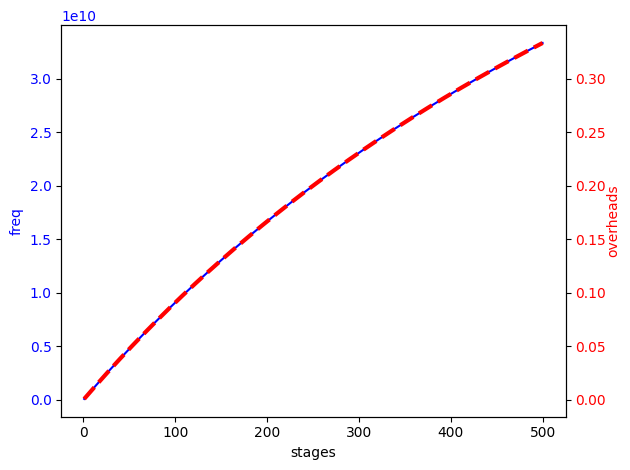

In [301]:
total_work = 10e-9 # 10 ns
latch_latency = 10e-12 # 10 ps

stages_1 = []
freq_1 = []
perf_1 = []
overheads_1 = []

for n in range(1, 501):
  n_useful_work = total_work / n
  n_freq = 1 / (n_useful_work + latch_latency)
  n_cpi = 1

  n_perf = n_freq / n_cpi

  stages_1.append(n)
  freq_1.append(n_freq)
  perf_1.append(n_perf)
  overheads_1.append(latch_latency / (n_useful_work + latch_latency))

plot(Data(stages_1, 'stages'), Data(freq_1, 'freq'), Data(overheads_1, 'overheads'))

In [283]:
max_freq = 1 / latch_latency
max_freq_ghz = max_freq / 1e9


print(f'max frequency: {max_freq_ghz}GHz')

max frequency: 100.0GHz


max_perf: 7958615200.955028, max_perf_freq: 28.571428571428573GHz, max_perf_pipeline_length: 400


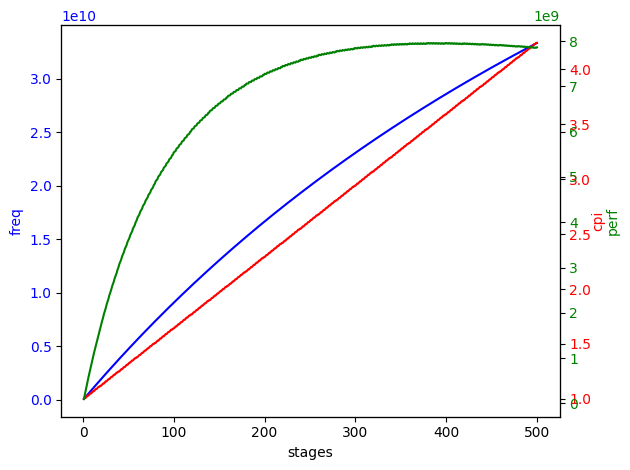

In [310]:
latency_for_branch_determination = 6.5e-9 # ns

probability_of_branches = 0.2
branch_pred_accuracy = 0.95
probability_of_non_branches = (1 - probability_of_branches)
branch_mis_pred_accuracy = (1 - branch_pred_accuracy)

max_perf_2 = 0
max_perf_freq_2 = 0
max_perf_pipeline_length_2 = 0

stages_2 = []
freq_2 = []
cpi_2 = []
perf_2 = []

for n in range(1, 501):
  n_useful_work = total_work / n
  n_freq = 1 / (n_useful_work + latch_latency)
  n_clocks_for_branch_determination = math.ceil(n * latency_for_branch_determination / total_work)
  n_cpi = (probability_of_non_branches * 1) + (probability_of_branches * ((branch_pred_accuracy * 1) + (branch_mis_pred_accuracy * n_clocks_for_branch_determination)))
  n_perf = n_freq / n_cpi

  if n_perf > max_perf_2:
    max_perf_2 = n_perf
    max_perf_freq_2 = n_freq
    max_perf_pipeline_length_2 = n

  stages_2.append(n)
  freq_2.append(n_freq)
  cpi_2.append(n_cpi)
  perf_2.append(n_perf)

print(f'max_perf: {max_perf_2}, max_perf_freq: {max_perf_freq_2 * 1e-9}GHz, max_perf_pipeline_length: {max_perf_pipeline_length_2}')

plot(Data(stages_2, 'stages'), Data(freq_2, 'freq'), Data(cpi_2, 'cpi'), Data(perf_2, 'perf'))

max_perf: 26720106880.427513, max_perf_freq: 33.333333333333336GHz, max_perf_pipeline_length: 500


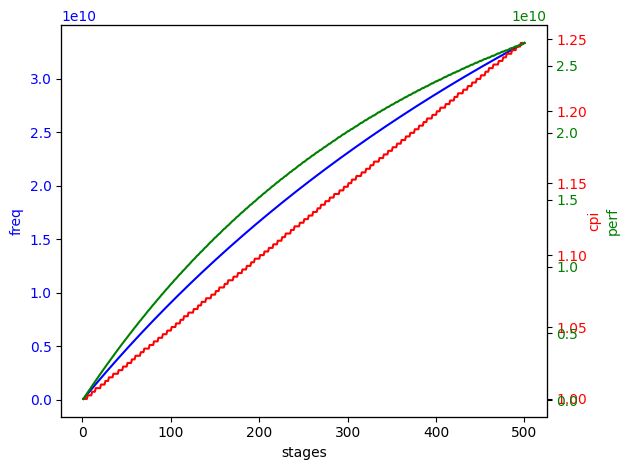

In [311]:
latency_for_cache_access = 2e-9 # 2ns
probability_of_loads = 0.125
cache_hit_rate = 0.98
probability_of_non_loads = 1 - probability_of_loads
cache_miss_rate = 1 - cache_hit_rate

max_perf_3 = 0
max_perf_freq_3 = 0
max_perf_pipeline_length_3 = 0

stages_3 = []
freq_3 = []
cpi_3 = []
clocks_for_load_3 = []
perf_3 = []

for n in range(1, 501):
  n_useful_work = total_work / n
  n_freq = 1 / (n_useful_work + latch_latency)
  n_clocks_for_load = math.ceil(latency_for_cache_access / n_useful_work)
  # n_clocks_for_load = math.ceil(latency_for_cache_access / (n_useful_work + latch_latency))
  n_cpi = (probability_of_non_loads * 1) + (probability_of_loads * ((cache_hit_rate * 1) + (cache_miss_rate * n_clocks_for_load)))
  n_perf = n_freq / n_cpi

  if n_perf > max_perf_3:
    max_perf_3 = n_perf
    max_perf_freq_3 = n_freq
    max_perf_pipeline_length_3 = n

  stages_3.append(n)
  freq_3.append(n_freq)
  clocks_for_load_3.append(n_clocks_for_load)
  cpi_3.append(n_cpi)
  perf_3.append(n_perf)

print(f'max_perf: {max_perf_3}, max_perf_freq: {max_perf_freq_3 * 1e-9}GHz, max_perf_pipeline_length: {max_perf_pipeline_length_3}')

# plot(Data(stages, 'stages'), Data(clocks_for_load, 'clocks_for_load'))

plot(Data(stages_3, 'stages'), Data(freq_3, 'freq'), Data(cpi_3, 'cpi'), Data(perf_3, 'perf'))

max_perf: 7604075863.461524, max_perf_freq: 27.84992784992785GHz, max_perf_pipeline_length: 386


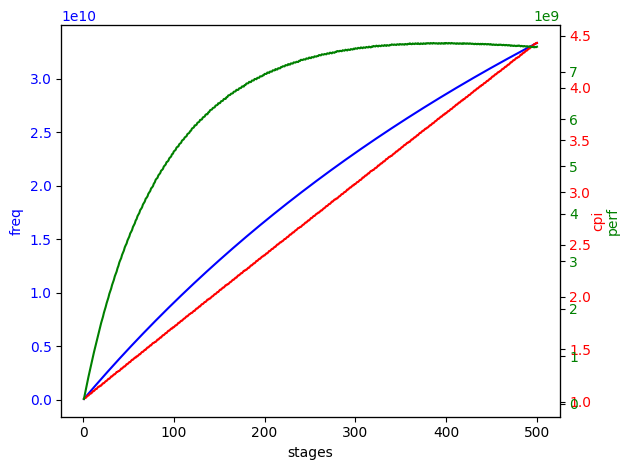

In [313]:
max_perf_4 = 0
max_perf_freq_4 = 0
max_perf_pipeline_length_4 = 0

stages_4 = []
freq_4 = []
cpi_4 = []
perf_4 = []

for n in range(1, 501):
  n_useful_work = total_work / n
  n_freq = 1 / (n_useful_work + latch_latency)

  n_clocks_for_branch_determination = math.ceil(n * latency_for_branch_determination / total_work)
  n_clocks_for_load = math.ceil(latency_for_cache_access * n_freq)

  n_cpi = (probability_of_non_branches * probability_of_non_loads * 1) + (probability_of_loads * ((cache_hit_rate * 1) + (cache_miss_rate * n_clocks_for_load))) + (probability_of_branches * ((branch_pred_accuracy * 1) + (branch_mis_pred_accuracy * n_clocks_for_branch_determination)))
  n_perf = n_freq / n_cpi

  if n_perf > max_perf_4:
    max_perf_4 = n_perf
    max_perf_freq_4 = n_freq
    max_perf_pipeline_length_4 = n

  stages_4.append(n)
  freq_4.append(n_freq)
  cpi_4.append(n_cpi)
  perf_4.append(n_perf)

print(f'max_perf: {max_perf_4}, max_perf_freq: {max_perf_freq_4 * 1e-9}GHz, max_perf_pipeline_length: {max_perf_pipeline_length_4}')

plot(Data(stages_4, 'stages'), Data(freq_4, 'freq'), Data(cpi_4, 'cpi'), Data(perf_4, 'perf'))

max_perf: 33333333333.333332, max_perf_power: 514.2500000000001, stages: 500
min_power: 1.5412087912087915, min_power_pipeline_length: 1
max_perf_per_watt_freq: 2.53411306042885GHz, max_perf_per_watt: 64819316.15621456, max_perf_per_watt_pipeline_length: 26


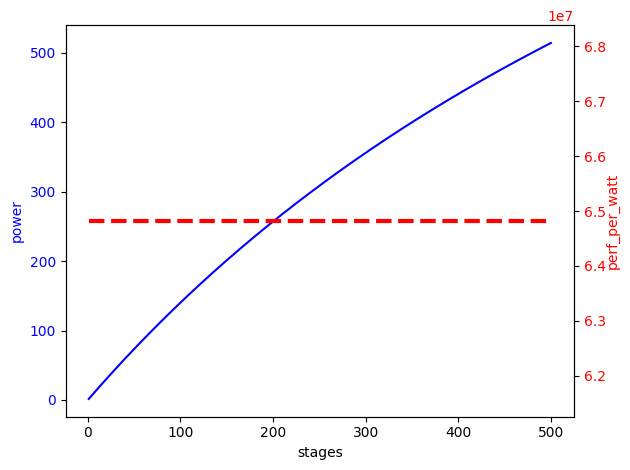

In [305]:
c = 12.75e-9 # 12.75 nF
v = 1.1 # 1.1 V

power_5 = []
perf_per_watt_5 = []

max_perf = 0
max_perf_power = 0
max_perf_pipeline_length = 0

min_power = float('inf')
min_power_pipeline_length = 0

max_perf_per_watt_freq = 0
max_perf_per_watt = float(0)
max_perf_per_watt_pipeline_length = 0

for idx, n in enumerate(stages_1):
  n_freq = freq_1[idx]
  n_perf = perf_1[idx]
  n_power = c * n_freq * v * v
  n_perf_per_watt = n_perf / n_power

  if n_perf > max_perf:
    max_perf = n_perf
    max_perf_power = n_power
    max_perf_pipeline_length = n

  if n_power < min_power:
    min_power = n_power
    min_power_pipeline_length = n

  if n_perf_per_watt > max_perf_per_watt:
    max_perf_per_watt_freq = n_freq
    max_perf_per_watt = n_perf_per_watt
    max_perf_per_watt_pipeline_length = n

  power_5.append(n_power)
  perf_per_watt_5.append(n_perf_per_watt)

print(f'max_perf: {max_perf}, max_perf_power: {max_perf_power}, stages: {max_perf_pipeline_length}')
print(f'min_power: {min_power}, min_power_pipeline_length: {min_power_pipeline_length}')
print(f'max_perf_per_watt_freq: {max_perf_per_watt_freq * 1e-9}GHz, max_perf_per_watt: {max_perf_per_watt}, max_perf_per_watt_pipeline_length: {max_perf_per_watt_pipeline_length}')

plot(Data(stages_1, 'stages'), Data(power_5, 'power'), Data(perf_per_watt_5, 'perf_per_watt'))

In [292]:
power = 50 # W

freq = power / (c * (v ** 2))

n = freq * total_work / (1 - (freq * latch_latency))

print(f'stages for hitting the power {power}W = {n}, freq = {freq * 1e-9}GHz')

stages for hitting the power 50W = 33.495226930162445, freq = 3.240965807810727GHz
